폰트 설정

In [1]:
#  폰트 설치
import matplotlib.font_manager as fm

!apt-get -qq -y install fonts-nanum > /dev/null
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()

In [ ]:
#런타임 재시작
import os
os.kill(os.getpid(), 9)

In [1]:
#  폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False
	
# 한글 폰트 설정
path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
font_name = fm.FontProperties(fname=path, size=18).get_name()
plt.rc('font', family=font_name)
fm._rebuild()

#**프로젝트 주제**

##지난 21 ~ 22시즌 기록을 바탕으로 이번 22 ~ 23시즌 NBA(미국 프로 농구 리그) 우승팀 예측

1. 데이터 분석

  -  정규 시즌 선수들의 스탯 데이터셋 기본정보
  -  팀 순위 데이터셋 기본정보
  -  플레이오프 선수들의 스탯 데이터셋 기본정보

정규 시즌 선수들의 스탯 데이터셋 기본정보

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Kaggle 사이트를 통해 수집한 데이터셋
reg_df=pd.read_csv('/content/RegularPlayerStats.csv') #정규 시즌 선수들의 스탯 데이터

print(reg_df.head(5))

   Rk             Player Pos  Age   Tm   G  GS    MP   FG   FGA  ...    FT%  \
0   1   Precious Achiuwa   C   22  TOR  73  28  23.6  3.6   8.3  ...  0.595   
1   2       Steven Adams   C   28  MEM  76  75  26.3  2.8   5.1  ...  0.543   
2   3        Bam Adebayo   C   24  MIA  56  56  32.6  7.3  13.0  ...  0.753   
3   4       Santi Aldama  PF   21  MEM  32   0  11.3  1.7   4.1  ...  0.625   
4   5  LaMarcus Aldridge   C   36  BRK  47  12  22.3  5.4   9.7  ...  0.873   

   ORB  DRB   TRB  AST  STL  BLK  TOV   PF   PTS  
0  2.0  4.5   6.5  1.1  0.5  0.6  1.2  2.1   9.1  
1  4.6  5.4  10.0  3.4  0.9  0.8  1.5  2.0   6.9  
2  2.4  7.6  10.1  3.4  1.4  0.8  2.6  3.1  19.1  
3  1.0  1.7   2.7  0.7  0.2  0.3  0.5  1.1   4.1  
4  1.6  3.9   5.5  0.9  0.3  1.0  0.9  1.7  12.9  

[5 rows x 30 columns]


In [141]:
reg_df.shape

(812, 30)

In [142]:
reg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      812 non-null    int64  
 1   Player  812 non-null    object 
 2   Pos     812 non-null    object 
 3   Age     812 non-null    int64  
 4   Tm      812 non-null    object 
 5   G       812 non-null    int64  
 6   GS      812 non-null    int64  
 7   MP      812 non-null    float64
 8   FG      812 non-null    float64
 9   FGA     812 non-null    float64
 10  FG%     812 non-null    float64
 11  3P      812 non-null    float64
 12  3PA     812 non-null    float64
 13  3P%     812 non-null    float64
 14  2P      812 non-null    float64
 15  2PA     812 non-null    float64
 16  2P%     812 non-null    float64
 17  eFG%    812 non-null    float64
 18  FT      812 non-null    float64
 19  FTA     812 non-null    float64
 20  FT%     812 non-null    float64
 21  ORB     812 non-null    float64
 22  DR

In [143]:
reg_df.describe()

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,...,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000
mean,304.501232,26.051724,36.704433,16.672414,18.265394,2.869951,6.386576,0.426235,0.871305,2.560591,...,0.658267,0.812931,2.519828,3.331650,1.808251,0.582759,0.353571,0.978695,1.564655,7.812438
std,172.637333,4.059640,25.899099,23.817195,9.648292,2.223988,4.651121,0.148525,0.841935,2.205642,...,0.283491,0.744196,1.790656,2.352818,1.838080,0.425452,0.360811,0.817941,0.826783,6.138077
min,1.000000,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,158.750000,23.000000,12.000000,0.000000,10.500000,1.200000,3.000000,0.380750,0.200000,0.800000,...,0.600000,0.300000,1.300000,1.700000,0.500000,0.300000,0.100000,0.400000,1.000000,3.300000
50%,300.500000,25.000000,36.500000,4.000000,17.500000,2.400000,5.150000,0.439500,0.700000,2.050000,...,0.750000,0.600000,2.300000,2.900000,1.200000,0.500000,0.300000,0.800000,1.600000,6.300000
75%,459.000000,29.000000,61.000000,25.000000,25.725000,3.900000,8.725000,0.500000,1.400000,3.900000,...,0.838000,1.100000,3.400000,4.400000,2.400000,0.900000,0.500000,1.300000,2.200000,10.600000
max,605.000000,41.000000,82.000000,82.000000,43.500000,11.400000,21.800000,1.000000,4.500000,11.700000,...,1.000000,4.600000,11.000000,14.700000,10.800000,2.500000,2.800000,4.800000,5.000000,30.600000


In [148]:
#알기 쉽게 열 이름 변경
reg_df.columns=['Rk','선수','포지션','나이','소속팀','출전 경기 수','선발 출전 횟수','평균 출전 시간','야투 성공','야투 시도','야투 성공률','3점슛 성공','3점슛 시도',
                '3점슛 성공률','2점슛 성공','2점슛 시도','2점슛 성공률','3점슛에 보정을 가한 효율성 수치','자유투 성공','자유투 시도','자유투 성공률','공격 리바운드',
                '수비 리바운드','총 리바운드','어시스트','스틸','블록','실책','파울','득점']

print(reg_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rk                  812 non-null    int64  
 1   선수                  812 non-null    object 
 2   포지션                 812 non-null    object 
 3   나이                  812 non-null    int64  
 4   소속팀                 812 non-null    object 
 5   출전 경기 수             812 non-null    int64  
 6   선발 출전 횟수            812 non-null    int64  
 7   평균 출전 시간            812 non-null    float64
 8   야투 성공               812 non-null    float64
 9   야투 시도               812 non-null    float64
 10  야투 성공률              812 non-null    float64
 11  3점슛 성공              812 non-null    float64
 12  3점슛 시도              812 non-null    float64
 13  3점슛 성공률             812 non-null    float64
 14  2점슛 성공              812 non-null    float64
 15  2점슛 시도              812 non-null    float64
 16  2점슛 성공률 

팀 순위 데이터셋 기본정보

In [199]:
#네이버와 구글에 공개된 팀 순위와 승패, 승률을 직접 csv로 옮겨 수집한 데이터
east_rank_df=pd.read_csv('/content/EastTeamRank.csv', encoding='cp949') #동부 컨퍼런스 순위
west_rank_df=pd.read_csv('/content/WestTeamRank.csv', encoding='cp949') #서부 컨퍼런스 순위

print(east_rank_df.head(5))
print(west_rank_df.head(5))

     팀   승   패  홈승  원정승     승률
0  MIA  53  29  29   24  0.646
1  BOS  51  31  28   23  0.622
2  MIL  51  31  27   24  0.622
3  PHI  51  31  24   27  0.622
4  TOR  48  34  24   24  0.585
     팀   승   패  홈승  원정승     승률
0  PHO  64  18  32   32  0.780
1  MEM  56  26  30   26  0.683
2  GSW  53  29  31   22  0.646
3  DAL  52  30  29   23  0.634
4  UTA  49  33  29   20  0.598


In [200]:
west_rank_df.shape
east_rank_df.shape

(15, 6)

In [201]:
west_rank_df.info()
east_rank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   팀       15 non-null     object 
 1   승       15 non-null     int64  
 2   패       15 non-null     int64  
 3   홈승      15 non-null     int64  
 4   원정승     15 non-null     int64  
 5   승률      15 non-null     float64
dtypes: float64(1), int64(4), object(1)
memory usage: 848.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   팀       15 non-null     object 
 1   승       15 non-null     int64  
 2   패       15 non-null     int64  
 3   홈승      15 non-null     int64  
 4   원정승     15 non-null     int64  
 5   승률      15 non-null     float64
dtypes: float64(1), int64(4), object(1)
memory usage: 848.0+ bytes


In [152]:
print(west_rank_df.describe(),'\n')
print(east_rank_df.describe())

               승          패         승률
count  15.000000  15.000000  15.000000
mean   40.933333  41.066667   0.499133
std    12.936475  12.936475   0.157656
min    20.000000  18.000000   0.244000
25%    31.500000  31.500000   0.384000
50%    42.000000  40.000000   0.512000
75%    50.500000  50.500000   0.616000
max    64.000000  62.000000   0.780000 

               승          패         승률
count  15.000000  15.000000  15.000000
mean   41.066667  40.933333   0.500733
std    10.477641  10.477641   0.127832
min    22.000000  29.000000   0.268000
25%    36.000000  32.500000   0.439000
50%    44.000000  38.000000   0.537000
75%    49.500000  46.000000   0.603500
max    53.000000  60.000000   0.646000


플레이오프 선수들의 스탯 데이터셋 기본정보

In [153]:
#Kaggle 사이트를 통해 수집한 데이터
po_df=pd.read_csv('/content/PlayoffsPlayerStats.csv') #플레이오프 선수들의 스탯 데이터

print(po_df.head(5))

   Rk                    Player Pos  Age   Tm   G  GS    MP   FG  FGA  ...  \
0   1          Precious Achiuwa   C   22  TOR   6   1  27.8  4.2  8.7  ...   
1   2              Steven Adams   C   28  MEM   7   5  16.3  1.3  3.0  ...   
2   3               Bam Adebayo   C   24  MIA  18  18  34.1  5.8  9.7  ...   
3   4  Nickeil Alexander-Walker  SG   23  UTA   1   0   5.0  2.0  2.0  ...   
4   5             Grayson Allen  SG   26  MIL  12   5  25.4  3.1  6.8  ...   

     FT%  ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS  
0  0.600  1.3  3.5  4.8  1.0  0.2  0.8  1.5  2.3  10.2  
1  0.545  2.1  4.3  6.4  2.1  0.1  0.1  0.6  1.7   3.4  
2  0.763  2.1  5.9  8.0  2.7  1.0  0.7  2.1  3.1  14.8  
3  1.000  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   5.0  
4  0.636  0.4  2.5  2.9  1.3  0.7  0.3  0.8  1.8   8.3  

[5 rows x 30 columns]


In [154]:
po_df.shape

(217, 30)

In [155]:
po_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      217 non-null    int64  
 1   Player  217 non-null    object 
 2   Pos     217 non-null    object 
 3   Age     217 non-null    int64  
 4   Tm      217 non-null    object 
 5   G       217 non-null    int64  
 6   GS      217 non-null    int64  
 7   MP      217 non-null    float64
 8   FG      217 non-null    float64
 9   FGA     217 non-null    float64
 10  FG%     217 non-null    float64
 11  3P      217 non-null    float64
 12  3PA     217 non-null    float64
 13  3P%     217 non-null    float64
 14  2P      217 non-null    float64
 15  2PA     217 non-null    float64
 16  2P%     217 non-null    float64
 17  eFG%    217 non-null    float64
 18  FT      217 non-null    float64
 19  FTA     217 non-null    float64
 20  FT%     217 non-null    float64
 21  ORB     217 non-null    float64
 22  DR

In [156]:
po_df.describe()

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,...,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000
mean,109.000000,26.589862,8.714286,4.009217,19.429032,3.045161,6.737788,0.437516,0.934562,2.700461,...,0.623249,0.773733,2.626728,3.404147,1.828571,0.584793,0.361290,1.085714,1.784332,8.457143
std,62.786676,4.238545,5.802412,5.944178,12.879892,2.699843,5.865455,0.184581,0.969323,2.538454,...,0.344243,0.848965,2.203811,2.842360,2.007120,0.499629,0.453458,1.126790,1.175811,7.625418
min,1.000000,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,23.000000,5.000000,0.000000,7.600000,1.000000,2.000000,0.370000,0.000000,0.500000,...,0.500000,0.200000,1.000000,1.200000,0.400000,0.200000,0.000000,0.300000,0.800000,2.100000
50%,109.000000,26.000000,6.000000,0.000000,18.400000,2.300000,4.700000,0.439000,0.700000,2.200000,...,0.750000,0.500000,2.000000,2.800000,1.000000,0.500000,0.200000,0.800000,1.800000,6.000000
75%,163.000000,29.000000,12.000000,6.000000,31.200000,4.500000,10.000000,0.500000,1.500000,4.400000,...,0.857000,1.000000,3.700000,4.800000,2.700000,0.900000,0.500000,1.500000,2.800000,12.600000
max,217.000000,38.000000,24.000000,24.000000,44.000000,12.200000,23.800000,1.000000,4.100000,10.400000,...,1.000000,5.500000,12.000000,14.300000,9.800000,2.100000,2.500000,6.200000,4.700000,31.700000


In [158]:
#알기 쉽게 열 이름 변경
po_df.columns=['Rk','선수','포지션','나이','소속팀','출전 경기 수','선발 출전 횟수','평균 출전 시간','야투 성공','야투 시도','야투 성공률','3점슛 성공','3점슛 시도',
                '3점슛 성공률','2점슛 성공','2점슛 시도','2점슛 성공률','3점슛에 보정을 가한 효율성 수치','자유투 성공','자유투 시도','자유투 성공률','공격 리바운드',
                '수비 리바운드','총 리바운드','어시스트','스틸','블록','실책','파울','득점']

print(po_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rk                  217 non-null    int64  
 1   선수                  217 non-null    object 
 2   포지션                 217 non-null    object 
 3   나이                  217 non-null    int64  
 4   소속팀                 217 non-null    object 
 5   출전 경기 수             217 non-null    int64  
 6   선발 출전 횟수            217 non-null    int64  
 7   평균 출전 시간            217 non-null    float64
 8   야투 성공               217 non-null    float64
 9   야투 시도               217 non-null    float64
 10  야투 성공률              217 non-null    float64
 11  3점슛 성공              217 non-null    float64
 12  3점슛 시도              217 non-null    float64
 13  3점슛 성공률             217 non-null    float64
 14  2점슛 성공              217 non-null    float64
 15  2점슛 시도              217 non-null    float64
 16  2점슛 성공률 

2. 데이터 전처리 및 변환

In [159]:
#데이터프레임 원본 보존을 위한 복사
reg_df1=reg_df[:] #reg_df1 -> 데이터 복사본
po_df1=po_df[:] #po_df1 -> 데이터 복사본

print(reg_df1.info())
print(po_df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rk                  812 non-null    int64  
 1   선수                  812 non-null    object 
 2   포지션                 812 non-null    object 
 3   나이                  812 non-null    int64  
 4   소속팀                 812 non-null    object 
 5   출전 경기 수             812 non-null    int64  
 6   선발 출전 횟수            812 non-null    int64  
 7   평균 출전 시간            812 non-null    float64
 8   야투 성공               812 non-null    float64
 9   야투 시도               812 non-null    float64
 10  야투 성공률              812 non-null    float64
 11  3점슛 성공              812 non-null    float64
 12  3점슛 시도              812 non-null    float64
 13  3점슛 성공률             812 non-null    float64
 14  2점슛 성공              812 non-null    float64
 15  2점슛 시도              812 non-null    float64
 16  2점슛 성공률 

In [160]:
#선수 중복 제거(마지막 데이터만 남긴다.) - 플레이오프 기간에는 이적이 없어 플레이오프 데이터에는 선수 중복이 없다
reg_df=reg_df.drop_duplicates(['선수'], keep='last')

print(reg_df.shape)

(605, 30)


In [161]:
#평균 출전 시간이 10분 이하인 선수는 중요한 선수가 아니니 해당 행 삭제
reg_df=reg_df[reg_df['평균 출전 시간']>10]
po_df=po_df[po_df['평균 출전 시간']>10]

print(reg_df.shape)
print(po_df.shape)

(465, 30)
(150, 30)


In [162]:
#플레이오프는 출전 경기가 많지 않아 삭제 하지 않고 남겨둔다
#정규 시즌 출전 경기 수가 10경기 이하인 선수는 팀에서 한 활약이 적어 해당 행 삭제
reg_df=reg_df[reg_df['출전 경기 수']>10]

print(reg_df.shape)

(416, 30)


In [163]:
#선수 이름을 인덱스로 설정
reg_df.set_index('선수', inplace=True)
print(reg_df.head(1))

po_df.set_index('선수', inplace=True)
print(po_df.head(1))

                  Rk 포지션  나이  소속팀  출전 경기 수  선발 출전 횟수  평균 출전 시간  야투 성공  야투 시도  \
선수                                                                             
Precious Achiuwa   1   C  22  TOR       73        28      23.6    3.6    8.3   

                  야투 성공률  ...  자유투 성공률  공격 리바운드  수비 리바운드  총 리바운드  어시스트   스틸  \
선수                        ...                                                 
Precious Achiuwa   0.439  ...    0.595      2.0      4.5     6.5   1.1  0.5   

                   블록   실책   파울   득점  
선수                                    
Precious Achiuwa  0.6  1.2  2.1  9.1  

[1 rows x 29 columns]
                  Rk 포지션  나이  소속팀  출전 경기 수  선발 출전 횟수  평균 출전 시간  야투 성공  야투 시도  \
선수                                                                             
Precious Achiuwa   1   C  22  TOR        6         1      27.8    4.2    8.7   

                  야투 성공률  ...  자유투 성공률  공격 리바운드  수비 리바운드  총 리바운드  어시스트   스틸  \
선수                        ...                                

In [164]:
#Rk 열은 필요한 열이 아니니 삭제
reg_df.drop('Rk',axis=1,inplace=True)
po_df.drop('Rk',axis=1,inplace=True)

print(reg_df.info())
print(po_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 416 entries, Precious Achiuwa to Ivica Zubac
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   포지션                 416 non-null    object 
 1   나이                  416 non-null    int64  
 2   소속팀                 416 non-null    object 
 3   출전 경기 수             416 non-null    int64  
 4   선발 출전 횟수            416 non-null    int64  
 5   평균 출전 시간            416 non-null    float64
 6   야투 성공               416 non-null    float64
 7   야투 시도               416 non-null    float64
 8   야투 성공률              416 non-null    float64
 9   3점슛 성공              416 non-null    float64
 10  3점슛 시도              416 non-null    float64
 11  3점슛 성공률             416 non-null    float64
 12  2점슛 성공              416 non-null    float64
 13  2점슛 시도              416 non-null    float64
 14  2점슛 성공률             416 non-null    float64
 15  3점슛에 보정을 가한 효율성 수치  416 non-null    flo

In [165]:
#선수 기여도를 보여주는 열 추가(선수 기여도 공식은 제가 생각한 공식으로 공식적인 공식이 아닙니다.)
#선수 기여도 = (득점+((어시스트+총 리바운드)*2)+스틸+블록-((실책+파울)*2))/평균 출전 시간
reg_df['선수 기여도']=(reg_df['득점']+((reg_df['어시스트']+reg_df['총 리바운드'])*2)+reg_df['스틸']+reg_df['블록']-((reg_df['실책']+reg_df['파울'])*2))/reg_df['평균 출전 시간']
po_df['선수 기여도']=(po_df['득점']+((po_df['어시스트']+po_df['총 리바운드'])*2)+po_df['스틸']+po_df['블록']-((po_df['실책']+po_df['파울'])*2))/po_df['평균 출전 시간']

print(reg_df['선수 기여도'])
print(po_df['선수 기여도'])

선수
Precious Achiuwa     0.796610
Steven Adams         1.079848
Bam Adebayo          1.131902
Santi Aldama         0.725664
LaMarcus Aldridge    0.977578
                       ...   
Thaddeus Young       0.825137
Trae Young           1.283668
Omer Yurtseven       1.111111
Cody Zeller          0.832061
Ivica Zubac          0.967213
Name: 선수 기여도, Length: 416, dtype: float64
선수
Precious Achiuwa    0.546763
Steven Adams        0.981595
Bam Adebayo         0.806452
Grayson Allen       0.492126
Jose Alvarado       0.338462
                      ...   
Robert Williams     0.853448
Ziaire Williams     0.500000
Delon Wright        0.788321
Thaddeus Young      0.696552
Trae Young          0.548387
Name: 선수 기여도, Length: 150, dtype: float64


In [166]:
sal_df=pd.read_csv('/content/player_info.csv') #선수 연봉만을 획득하기 위한 데이터셋(Kaggle을 통하여 수집) - 단위:달러

print(sal_df.head(5),'\n')

#정규시즌 플레이어 스탯 데이터에 연봉 추가
for i in sal_df.index:
  for j in reg_df.index:
    if j == sal_df.loc[i,'Name']:
      reg_df.loc[j,'연봉']=sal_df.loc[i,'Salary']
  for k in po_df.index:
    if k == sal_df.loc[i,'Name']:
      po_df.loc[k,'연봉']=sal_df.loc[i,'Salary']

print(reg_df['연봉'],'\n')
print(po_df['연봉'])

             Name Position            Team  Age  Height  Height_i  Weight  \
0  Juhann Begarin       SG  Boston Celtics   19   6' 5"      6.50     185   
1    Jaylen Brown       SG  Boston Celtics   24   6' 6"      6.60     223   
2       Kris Dunn       PG  Boston Celtics   27   6' 3"      6.30     205   
3  Carsen Edwards       PG  Boston Celtics   23  5' 11"      5.11     200   
4      Tacko Fall        C  Boston Celtics   25   7' 5"      7.50     311   

      College      Salary  Points  Rebounds  Assists  
0         NaN         NaN     NaN       NaN      NaN  
1  California  26758928.0    24.7       6.0      3.4  
2  Providence   5005350.0     1.3       1.5      0.5  
3      Purdue   1782621.0     4.0       0.8      0.5  
4         UCF         NaN     2.5       2.7      0.2   

선수
Precious Achiuwa      2711280.0
Steven Adams         17073171.0
Bam Adebayo          28103500.0
Santi Aldama          1994520.0
LaMarcus Aldridge           NaN
                        ...    
Thaddeus Y

In [167]:
print(reg_df.info())
print(po_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 416 entries, Precious Achiuwa to Ivica Zubac
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   포지션                 416 non-null    object 
 1   나이                  416 non-null    int64  
 2   소속팀                 416 non-null    object 
 3   출전 경기 수             416 non-null    int64  
 4   선발 출전 횟수            416 non-null    int64  
 5   평균 출전 시간            416 non-null    float64
 6   야투 성공               416 non-null    float64
 7   야투 시도               416 non-null    float64
 8   야투 성공률              416 non-null    float64
 9   3점슛 성공              416 non-null    float64
 10  3점슛 시도              416 non-null    float64
 11  3점슛 성공률             416 non-null    float64
 12  2점슛 성공              416 non-null    float64
 13  2점슛 시도              416 non-null    float64
 14  2점슛 성공률             416 non-null    float64
 15  3점슛에 보정을 가한 효율성 수치  416 non-null    flo

In [168]:
#연봉에 존재하는 결측치를 nba의 최소 연봉인 922000으로 채우기
reg_df['연봉']=reg_df['연봉'].fillna(922000)
po_df['연봉']=po_df['연봉'].fillna(922000)

In [169]:
print(reg_df.info())
print(po_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 416 entries, Precious Achiuwa to Ivica Zubac
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   포지션                 416 non-null    object 
 1   나이                  416 non-null    int64  
 2   소속팀                 416 non-null    object 
 3   출전 경기 수             416 non-null    int64  
 4   선발 출전 횟수            416 non-null    int64  
 5   평균 출전 시간            416 non-null    float64
 6   야투 성공               416 non-null    float64
 7   야투 시도               416 non-null    float64
 8   야투 성공률              416 non-null    float64
 9   3점슛 성공              416 non-null    float64
 10  3점슛 시도              416 non-null    float64
 11  3점슛 성공률             416 non-null    float64
 12  2점슛 성공              416 non-null    float64
 13  2점슛 시도              416 non-null    float64
 14  2점슛 성공률             416 non-null    float64
 15  3점슛에 보정을 가한 효율성 수치  416 non-null    flo

In [218]:
#팀이 서부 컨퍼런스인지 동부 컨퍼런스인지 구분하기 위한 열 추가
for i in reg_df.index:
  j=reg_df.loc[i,'소속팀']
  if j == 'MIA' or j == 'BOS' or j == 'MIL' or j == 'PHI' or j == 'TOR' or j == 'CHI' or j == 'BRK' or j == 'ATL' or j == 'CLE' or j == 'CHO' or j == 'NYK' or j == 'WAS' or j == 'IND' or j == 'DET' or j == 'ORL':
    reg_df.loc[i,'소속 컨퍼런스'] = '동부'
  else:
    reg_df.loc[i,'소속 컨퍼런스'] = '서부'

for i in po_df.index:
  j=po_df.loc[i,'소속팀']
  if j == 'MIA' or j == 'BOS' or j == 'MIL' or j == 'PHI' or j == 'TOR' or j == 'CHI' or j == 'BRK' or j == 'ATL' or j == 'CLE' or j == 'CHO' or j == 'NYK' or j == 'WAS' or j == 'IND' or j == 'DET' or j == 'ORL':
    po_df.loc[i,'소속 컨퍼런스'] = '동부'
  else:
    po_df.loc[i,'소속 컨퍼런스'] = '서부'

west_rank_df['소속 컨퍼런스'] = '서부'

east_rank_df['소속 컨퍼런스'] = '동부'

In [181]:
print(reg_df.info())
print(po_df.info())
print(west_rank_df.info())
print(east_rank_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 416 entries, Precious Achiuwa to Ivica Zubac
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   포지션                 416 non-null    object 
 1   나이                  416 non-null    int64  
 2   소속팀                 416 non-null    object 
 3   출전 경기 수             416 non-null    int64  
 4   선발 출전 횟수            416 non-null    int64  
 5   평균 출전 시간            416 non-null    float64
 6   야투 성공               416 non-null    float64
 7   야투 시도               416 non-null    float64
 8   야투 성공률              416 non-null    float64
 9   3점슛 성공              416 non-null    float64
 10  3점슛 시도              416 non-null    float64
 11  3점슛 성공률             416 non-null    float64
 12  2점슛 성공              416 non-null    float64
 13  2점슛 시도              416 non-null    float64
 14  2점슛 성공률             416 non-null    float64
 15  3점슛에 보정을 가한 효율성 수치  416 non-null    flo

In [219]:
#각 컨퍼런스의 순위를 승률로 정렬
#승률이 동일하면 홈승이 많은 팀이 더 높은 순위를 가짐
#동부 컨퍼런스
east_rank_df['순위']=east_rank_df[['승률','홈승']].apply(tuple,axis=1).rank(ascending=False)
east_rank_df.sort_values(by='순위',inplace=True)
print(east_rank_df,'\n')

#서부 컨퍼런스
west_rank_df['순위']=west_rank_df[['승률','홈승']].apply(tuple,axis=1).rank(ascending=False)
west_rank_df.sort_values(by='순위',inplace=True)
print(west_rank_df)

      팀   승   패  홈승  원정승     승률    순위 소속 컨퍼런스
0   MIA  53  29  29   24  0.646   1.0      동부
1   BOS  51  31  28   23  0.622   2.0      동부
2   MIL  51  31  27   24  0.622   3.0      동부
3   PHI  51  31  24   27  0.622   4.0      동부
4   TOR  48  34  24   24  0.585   5.0      동부
5   CHI  46  36  27   19  0.561   6.0      동부
8   CLE  44  38  25   19  0.537   7.0      동부
6   BRK  44  38  20   24  0.537   8.0      동부
7   ATL  43  39  27   16  0.524   9.0      동부
9   CHO  43  39  22   21  0.524  10.0      동부
10  NYK  37  45  17   20  0.451  11.0      동부
11  WAS  35  47  21   14  0.427  12.0      동부
12  IND  25  57  16    9  0.305  13.0      동부
13  DET  23  59  13   10  0.280  14.0      동부
14  ORL  22  60  12   10  0.268  15.0      동부 

      팀   승   패  홈승  원정승     승률    순위 소속 컨퍼런스
0   PHO  64  18  32   32  0.780   1.0      서부
1   MEM  56  26  30   26  0.683   2.0      서부
2   GSW  53  29  31   22  0.646   3.0      서부
3   DAL  52  30  29   23  0.634   4.0      서부
4   UTA  49  33  29   20  0.598 

In [220]:
#전체 순위 데이터 만들기(승률로 정렬 -> 승률이 동일하면 홈승이 많은 팀이 더 높은 순위를 가짐)
total_rank_df=pd.concat([east_rank_df,west_rank_df])
total_rank_df['순위']=total_rank_df[['승률','홈승']].apply(tuple,axis=1).rank(ascending=False)
total_rank_df.sort_values(by='순위',inplace=True)
print(total_rank_df)

      팀   승   패  홈승  원정승     승률    순위 소속 컨퍼런스
0   PHO  64  18  32   32  0.780   1.0      서부
1   MEM  56  26  30   26  0.683   2.0      서부
2   GSW  53  29  31   22  0.646   3.0      서부
0   MIA  53  29  29   24  0.646   4.0      동부
3   DAL  52  30  29   23  0.634   5.0      서부
1   BOS  51  31  28   23  0.622   6.0      동부
2   MIL  51  31  27   24  0.622   7.0      동부
3   PHI  51  31  24   27  0.622   8.0      동부
4   UTA  49  33  29   20  0.598   9.0      서부
4   TOR  48  34  24   24  0.585  10.0      동부
5   DEN  48  34  23   25  0.585  11.0      서부
5   CHI  46  36  27   19  0.561  12.0      동부
6   MIN  46  36  26   20  0.561  13.0      서부
8   CLE  44  38  25   19  0.537  14.0      동부
6   BRK  44  38  20   24  0.537  15.0      동부
7   ATL  43  39  27   16  0.524  16.0      동부
9   CHO  43  39  22   21  0.524  17.0      동부
8   LAC  42  40  25   17  0.512  18.0      서부
10  NYK  37  45  17   20  0.451  19.0      동부
7   NOP  36  46  19   17  0.439  20.0      서부
11  WAS  35  47  21   14  0.427  2

In [223]:
#순위를 나타내는 세 데이터프레임의 인덱스를 순위로 지정
west_rank_df.set_index('순위',inplace=True)
east_rank_df.set_index('순위',inplace=True)
total_rank_df.set_index('순위',inplace=True)

In [227]:
print(west_rank_df.info())
print(east_rank_df.info())
print(total_rank_df.info())

<class 'pandas.core.frame.DataFrame'>
Float64Index: 15 entries, 1.0 to 15.0
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   팀        15 non-null     object 
 1   승        15 non-null     int64  
 2   패        15 non-null     int64  
 3   홈승       15 non-null     int64  
 4   원정승      15 non-null     int64  
 5   승률       15 non-null     float64
 6   소속 컨퍼런스  15 non-null     object 
dtypes: float64(1), int64(4), object(2)
memory usage: 960.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
Float64Index: 15 entries, 1.0 to 15.0
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   팀        15 non-null     object 
 1   승        15 non-null     int64  
 2   패        15 non-null     int64  
 3   홈승       15 non-null     int64  
 4   원정승      15 non-null     int64  
 5   승률       15 non-null     float64
 6   소속 컨퍼런스  15 non-null     object 
dtypes: float64(1), int64(4)

3. 시각화

정규 시즌 팀별 연봉 총합 비교(전체)

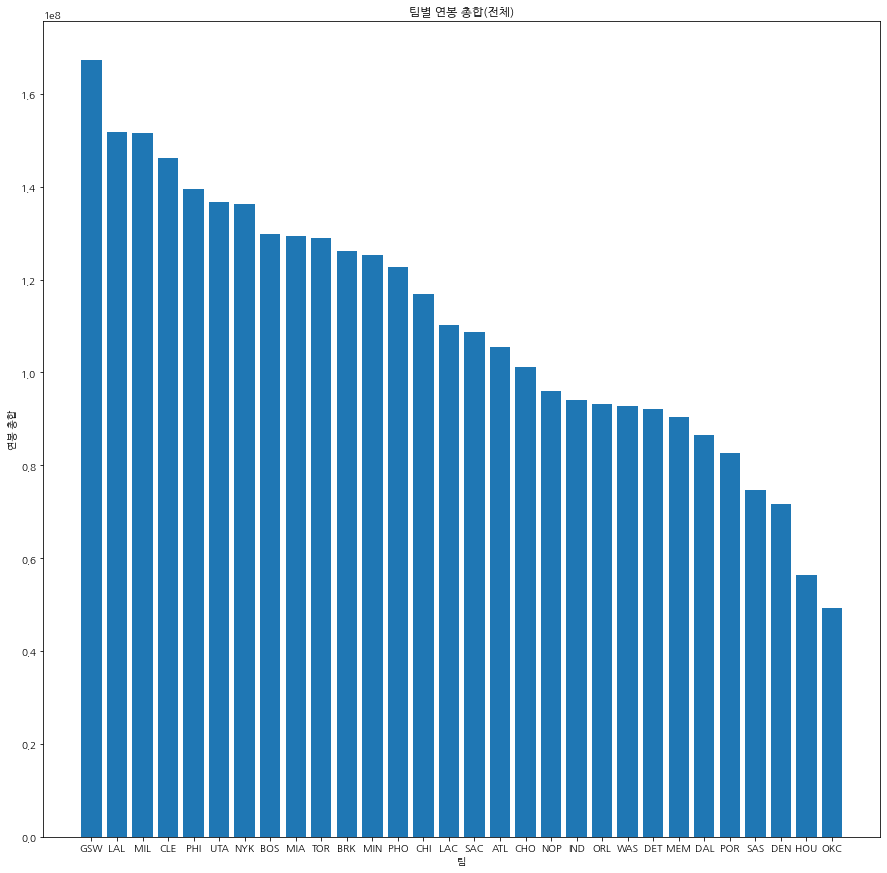

In [174]:
total_salary=reg_df.groupby('소속팀')['연봉'].sum()
total_salary=total_salary.sort_values(ascending=False)

plt.figure(figsize=(15, 15))
plt.bar(total_salary.index,total_salary,width=0.8)
plt.title("팀별 연봉 총합(전체)")
plt.xlabel("팀")
plt.ylabel("연봉 총합")
plt.show()

정규 시즌 팀별 연봉 총합 비교(컨퍼런스)

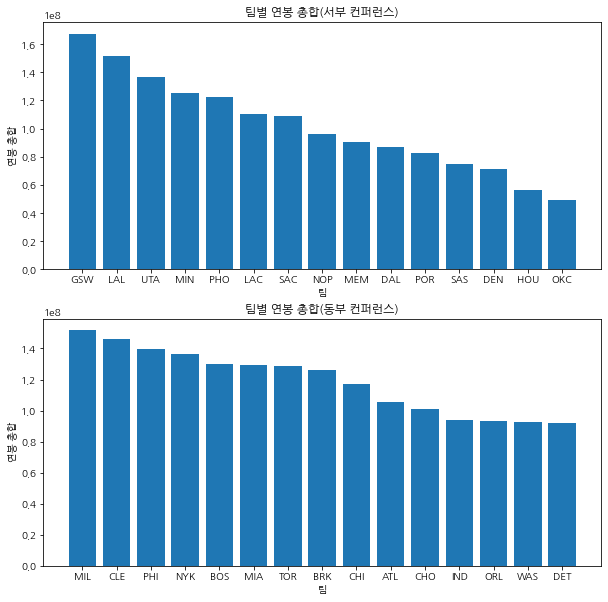

In [236]:
west_reg_df=reg_df[reg_df['소속 컨퍼런스']=='서부']
east_reg_df=reg_df[reg_df['소속 컨퍼런스']=='동부']

total_salary_west=west_reg_df.groupby('소속팀')['연봉'].sum()
total_salary_west=total_salary_west.sort_values(ascending=False)

total_salary_east=east_reg_df.groupby('소속팀')['연봉'].sum()
total_salary_east=total_salary_east.sort_values(ascending=False)

fig, ax=plt.subplots(2,1,figsize=(10,10))
ax[0].bar(total_salary_west.index,total_salary_west,width=0.8)
ax[0].set_title("팀별 연봉 총합(서부 컨퍼런스)")
ax[0].set_xlabel("팀")
ax[0].set_ylabel("연봉 총합")

ax[1].bar(total_salary_east.index,total_salary_east,width=0.8)
ax[1].set_title("팀별 연봉 총합(동부 컨퍼런스)")
ax[1].set_xlabel("팀")
ax[1].set_ylabel("연봉 총합")
plt.show()

팀별 득점 총합 비교(전체)

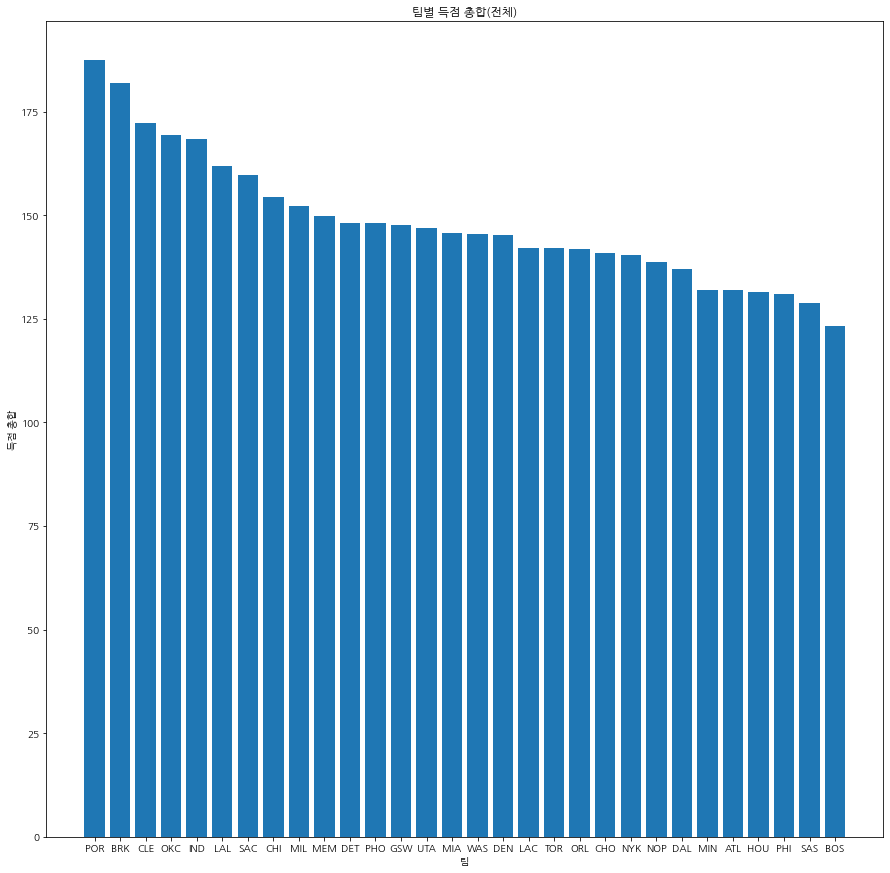

In [264]:
#팀 별로 인원 수가 달라서 정확한 데이터는 아니지만 주요 선수들의 데이터만 남겨서 대략적인 득점력을 알 수 있어서 해당 데이터를 비교
total_score=reg_df.groupby('소속팀')['득점'].sum()
total_score=total_score.sort_values(ascending=False)

plt.figure(figsize=(15, 15))
plt.bar(total_score.index,total_score,width=0.8)
plt.title("팀별 득점 총합(전체)")
plt.xlabel("팀")
plt.ylabel("득점 총합")
plt.show()

정규 시즌 팀별 득점 총합 비교(컨퍼런스)

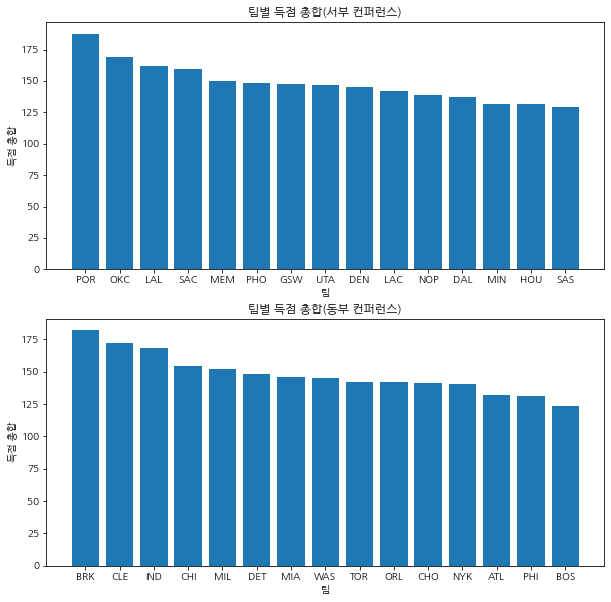

In [265]:
total_score_west=west_reg_df.groupby('소속팀')['득점'].sum()
total_score_west=total_score_west.sort_values(ascending=False)

total_score_east=east_reg_df.groupby('소속팀')['득점'].sum()
total_score_east=total_score_east.sort_values(ascending=False)

fig, ax=plt.subplots(2,1,figsize=(10,10))
ax[0].bar(total_score_west.index,total_score_west,width=0.8)
ax[0].set_title("팀별 득점 총합(서부 컨퍼런스)")
ax[0].set_xlabel("팀")
ax[0].set_ylabel("득점 총합")

ax[1].bar(total_score_east.index,total_score_east,width=0.8)
ax[1].set_title("팀별 득점 총합(동부 컨퍼런스)")
ax[1].set_xlabel("팀")
ax[1].set_ylabel("득점 총합")
plt.show()

팀별 어시스트 총합 비교(전체)

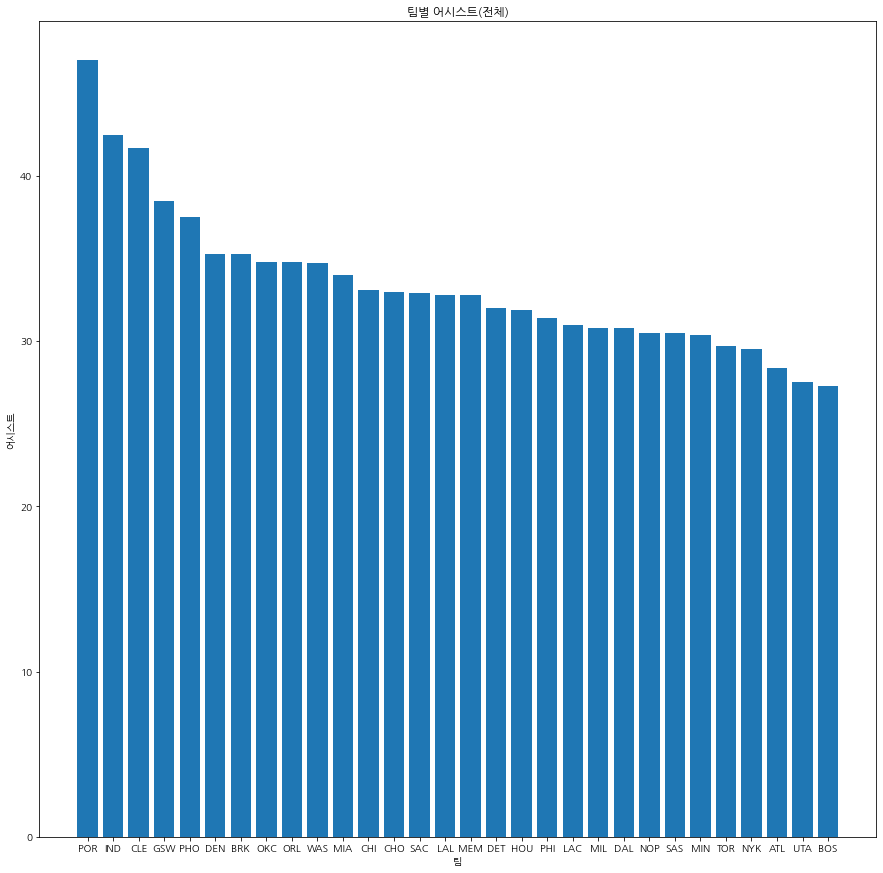

In [261]:
#팀 별로 인원 수가 달라서 정확한 데이터는 아니지만 주요 선수들의 데이터만 남겨서 대략적인 공격 집중력을 알 수 있어서 해당 데이터를 비교
total_assist=reg_df.groupby('소속팀')['어시스트'].sum()
total_assist=total_assist.sort_values(ascending=False)

plt.figure(figsize=(15, 15))
plt.bar(total_assist.index,total_assist,width=0.8)
plt.title("팀별 어시스트(전체)")
plt.xlabel("팀")
plt.ylabel("어시스트")
plt.show()

정규 시즌 팀별 어시스트 총합 비교(컨퍼런스)

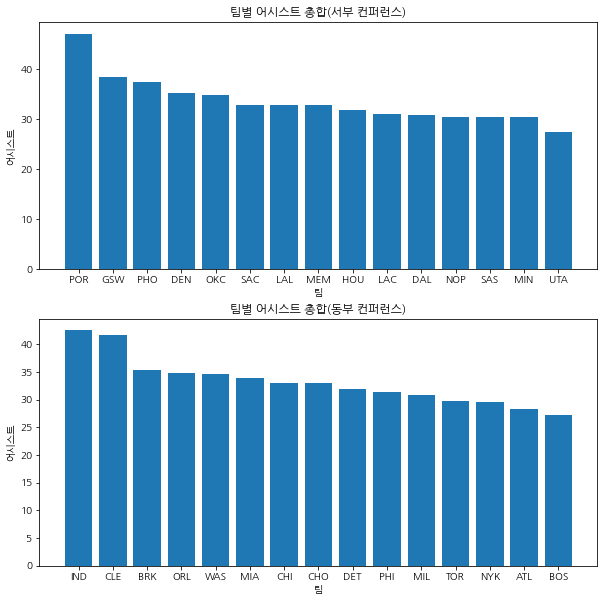

In [266]:
total_assist_west=west_reg_df.groupby('소속팀')['어시스트'].sum()
total_assist_west=total_assist_west.sort_values(ascending=False)

total_assist_east=east_reg_df.groupby('소속팀')['어시스트'].sum()
total_assist_east=total_assist_east.sort_values(ascending=False)

fig, ax=plt.subplots(2,1,figsize=(10,10))
ax[0].bar(total_assist_west.index,total_assist_west,width=0.8)
ax[0].set_title("팀별 어시스트 총합(서부 컨퍼런스)")
ax[0].set_xlabel("팀")
ax[0].set_ylabel("어시스트")

ax[1].bar(total_assist_east.index,total_assist_east,width=0.8)
ax[1].set_title("팀별 어시스트 총합(동부 컨퍼런스)")
ax[1].set_xlabel("팀")
ax[1].set_ylabel("어시스트")
plt.show()

정규 시즌 팀별 수비 리바운드 총합 비교(컨퍼런스)

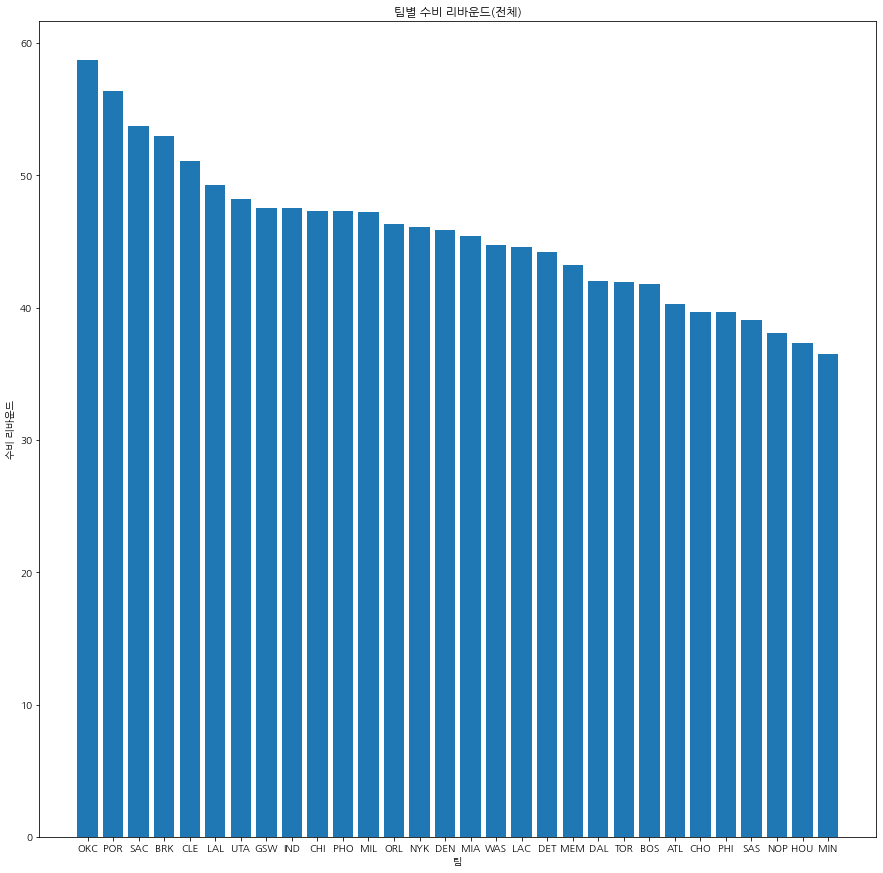

In [267]:
#팀 별로 인원 수가 달라서 정확한 데이터는 아니지만 주요 선수들의 데이터만 남겨서 대략적인 수비 집중력을 알 수 있어서 해당 데이터를 비교
total_defence_rebound=reg_df.groupby('소속팀')['수비 리바운드'].sum()
total_defence_rebound=total_defence_rebound.sort_values(ascending=False)

plt.figure(figsize=(15, 15))
plt.bar(total_defence_rebound.index,total_defence_rebound,width=0.8)
plt.title("팀별 수비 리바운드(전체)")
plt.xlabel("팀")
plt.ylabel("수비 리바운드")
plt.show()

정규 시즌 팀별 수비 리바운드 총합 비교(컨퍼런스)

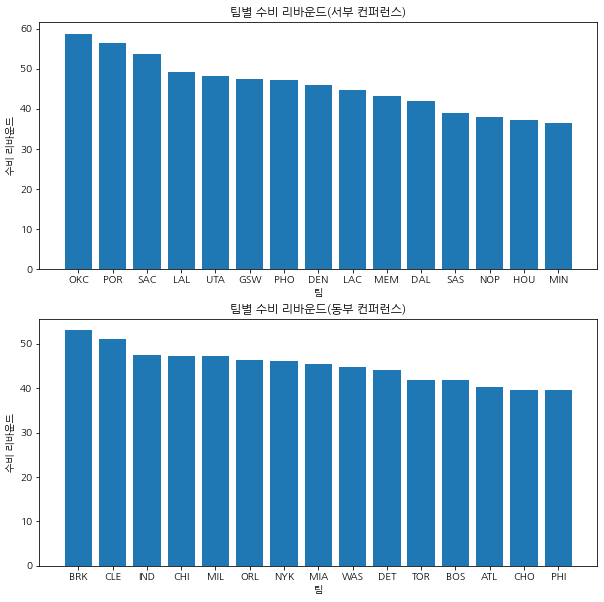

In [268]:
total_defence_rebound_west=west_reg_df.groupby('소속팀')['수비 리바운드'].sum()
total_defence_rebound_west=total_defence_rebound_west.sort_values(ascending=False)

total_defence_rebound_east=east_reg_df.groupby('소속팀')['수비 리바운드'].sum()
total_defence_rebound_east=total_defence_rebound_east.sort_values(ascending=False)

fig, ax=plt.subplots(2,1,figsize=(10,10))
ax[0].bar(total_defence_rebound_west.index,total_defence_rebound_west,width=0.8)
ax[0].set_title("팀별 수비 리바운드(서부 컨퍼런스)")
ax[0].set_xlabel("팀")
ax[0].set_ylabel("수비 리바운드")

ax[1].bar(total_defence_rebound_east.index,total_defence_rebound_east,width=0.8)
ax[1].set_title("팀별 수비 리바운드(동부 컨퍼런스)")
ax[1].set_xlabel("팀")
ax[1].set_ylabel("수비 리바운드")
plt.show()

정규 시즌 팀별 공격 리바운드 총합 비교(전체)

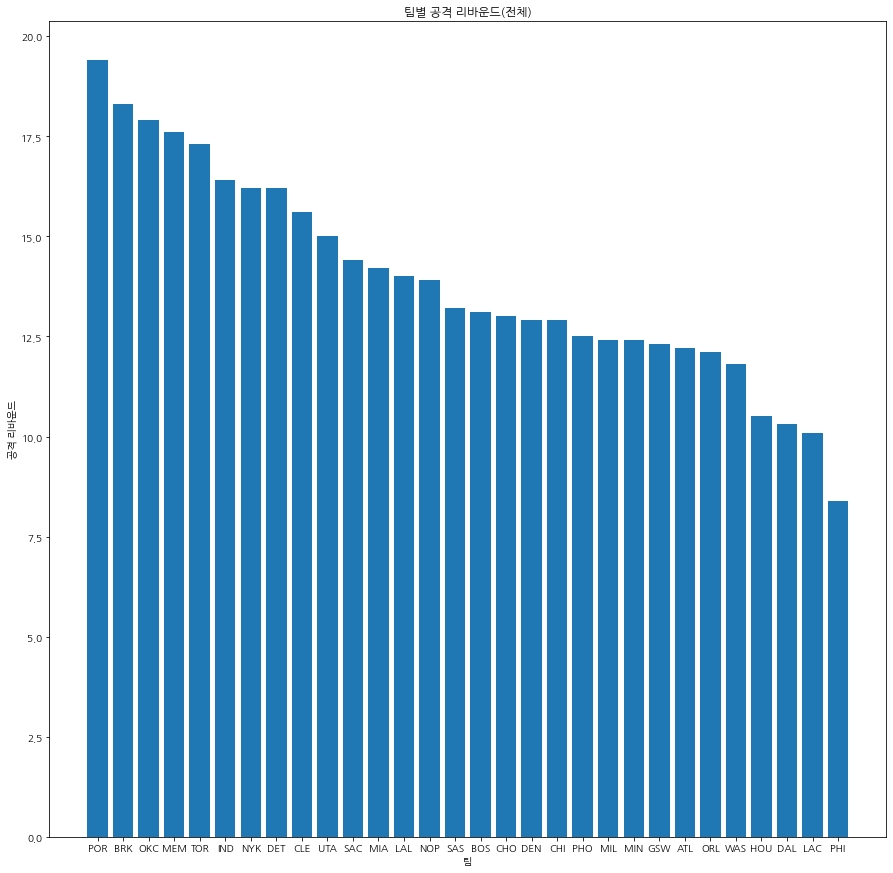

In [269]:
#팀 별로 인원 수가 달라서 정확한 데이터는 아니지만 주요 선수들의 데이터만 남겨서 대략적인 공격 집중력을 알 수 있어서 해당 데이터를 비교
total_offence_rebound=reg_df.groupby('소속팀')['공격 리바운드'].sum()
total_offence_rebound=total_offence_rebound.sort_values(ascending=False)

plt.figure(figsize=(15, 15))
plt.bar(total_offence_rebound.index,total_offence_rebound,width=0.8)
plt.title("팀별 공격 리바운드(전체)")
plt.xlabel("팀")
plt.ylabel("공격 리바운드")
plt.show()

정규 시즌 팀별 공격 리바운드 총합 비교(컨퍼런스)

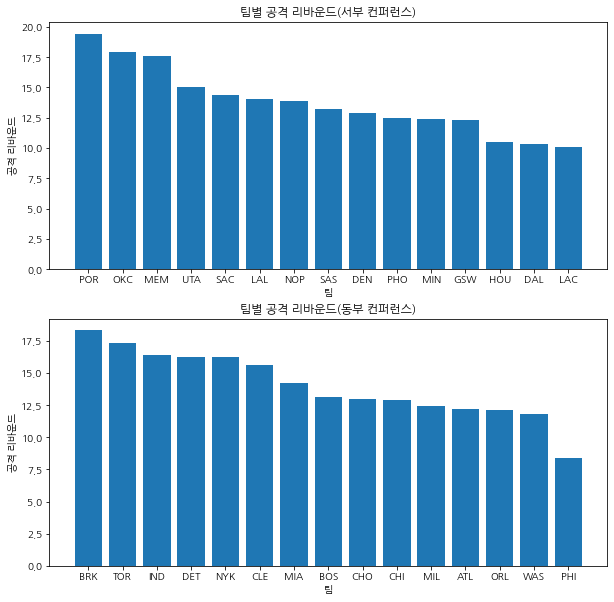

In [270]:
total_offence_rebound_west=west_reg_df.groupby('소속팀')['공격 리바운드'].sum()
total_offence_rebound_west=total_offence_rebound_west.sort_values(ascending=False)

total_offence_rebound_east=east_reg_df.groupby('소속팀')['공격 리바운드'].sum()
total_offence_rebound_east=total_offence_rebound_east.sort_values(ascending=False)

fig, ax=plt.subplots(2,1,figsize=(10,10))
ax[0].bar(total_offence_rebound_west.index,total_offence_rebound_west,width=0.8)
ax[0].set_title("팀별 공격 리바운드(서부 컨퍼런스)")
ax[0].set_xlabel("팀")
ax[0].set_ylabel("공격 리바운드")

ax[1].bar(total_offence_rebound_east.index,total_offence_rebound_east,width=0.8)
ax[1].set_title("팀별 공격 리바운드(동부 컨퍼런스)")
ax[1].set_xlabel("팀")
ax[1].set_ylabel("공격 리바운드")
plt.show()

정규 시즌 팀별 스틸 총합 비교(전체)

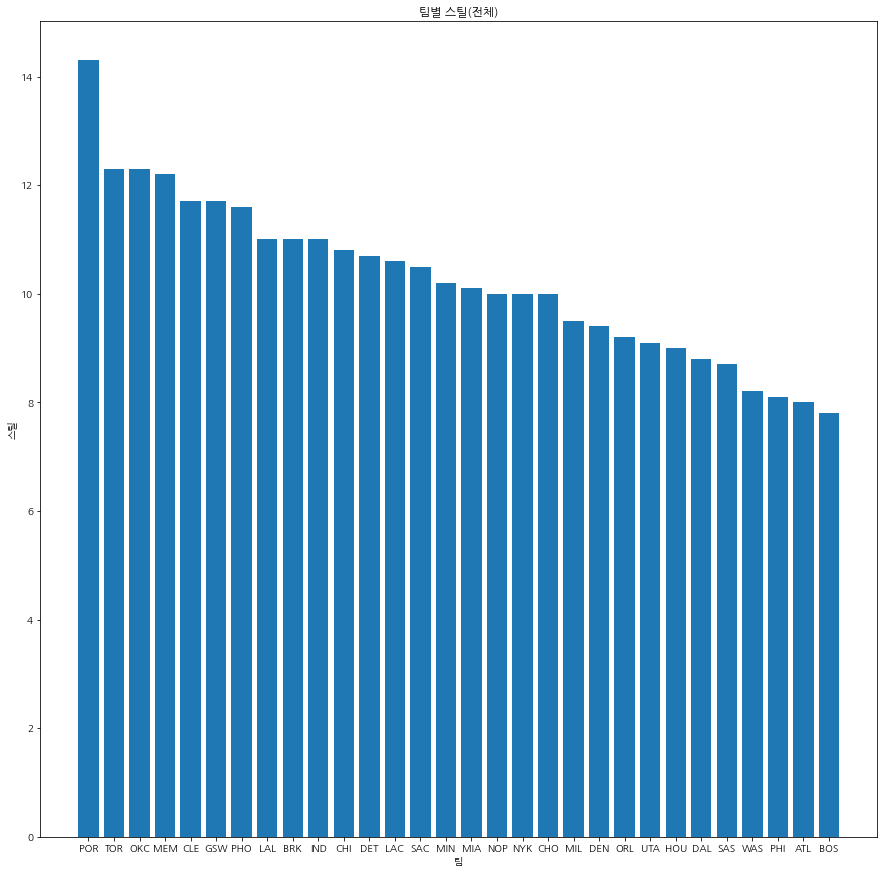

In [271]:
#팀 별로 인원 수가 달라서 정확한 데이터는 아니지만 주요 선수들의 데이터만 남겨서 대략적인 수비 집중력을 알 수 있어서 해당 데이터를 비교
total_steal=reg_df.groupby('소속팀')['스틸'].sum()
total_steal=total_steal.sort_values(ascending=False)

plt.figure(figsize=(15, 15))
plt.bar(total_steal.index,total_steal,width=0.8)
plt.title("팀별 스틸(전체)")
plt.xlabel("팀")
plt.ylabel("스틸")
plt.show()

정규 시즌 팀별 스틸 총합 비교(컨퍼런스)

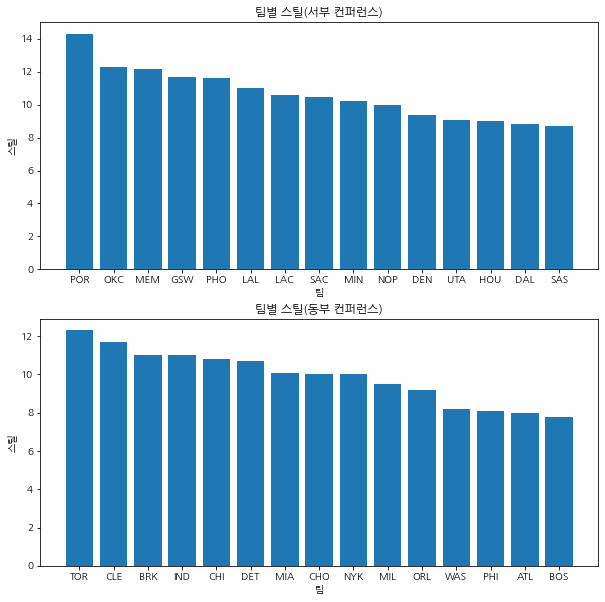

In [272]:
total_steal_west=west_reg_df.groupby('소속팀')['스틸'].sum()
total_steal_west=total_steal_west.sort_values(ascending=False)

total_steal_east=east_reg_df.groupby('소속팀')['스틸'].sum()
total_steal_east=total_steal_east.sort_values(ascending=False)

fig, ax=plt.subplots(2,1,figsize=(10,10))
ax[0].bar(total_steal_west.index,total_steal_west,width=0.8)
ax[0].set_title("팀별 스틸(서부 컨퍼런스)")
ax[0].set_xlabel("팀")
ax[0].set_ylabel("스틸")

ax[1].bar(total_steal_east.index,total_steal_east,width=0.8)
ax[1].set_title("팀별 스틸(동부 컨퍼런스)")
ax[1].set_xlabel("팀")
ax[1].set_ylabel("스틸")
plt.show()

정규 시즌 팀별 블록 총합 비교(전체)

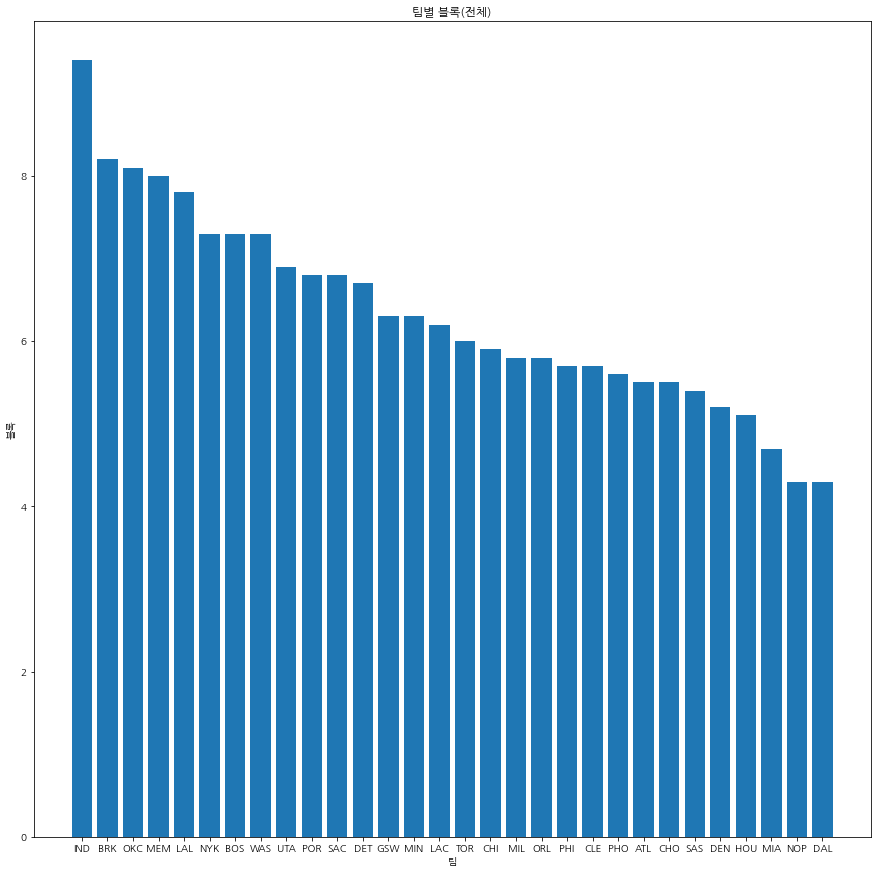

In [273]:
#팀 별로 인원 수가 달라서 정확한 데이터는 아니지만 주요 선수들의 데이터만 남겨서 대략적인 수비 집중력을 알 수 있어서 해당 데이터를 비교
total_block=reg_df.groupby('소속팀')['블록'].sum()
total_block=total_block.sort_values(ascending=False)

plt.figure(figsize=(15, 15))
plt.bar(total_block.index,total_block,width=0.8)
plt.title("팀별 블록(전체)")
plt.xlabel("팀")
plt.ylabel("블록")
plt.show()

정규 시즌 팀별 블록 총합 비교(컨퍼런스)

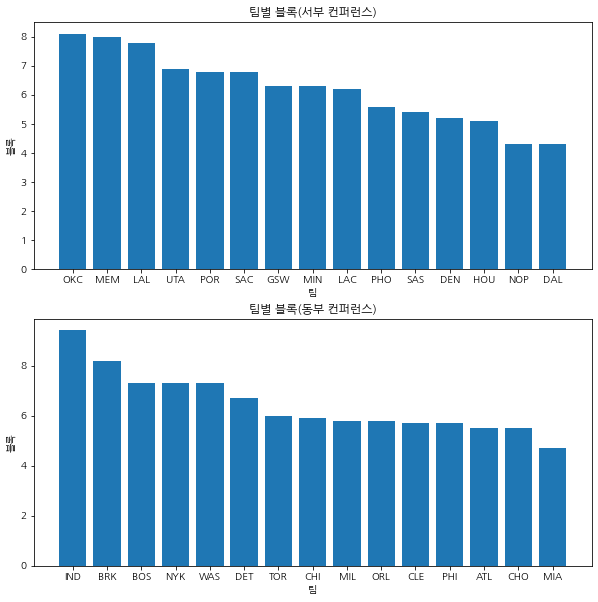

In [274]:
total_block_west=west_reg_df.groupby('소속팀')['블록'].sum()
total_block_west=total_block_west.sort_values(ascending=False)

total_block_east=east_reg_df.groupby('소속팀')['블록'].sum()
total_block_east=total_block_east.sort_values(ascending=False)

fig, ax=plt.subplots(2,1,figsize=(10,10))
ax[0].bar(total_block_west.index,total_block_west,width=0.8)
ax[0].set_title("팀별 블록(서부 컨퍼런스)")
ax[0].set_xlabel("팀")
ax[0].set_ylabel("블록")

ax[1].bar(total_block_east.index,total_block_east,width=0.8)
ax[1].set_title("팀별 블록(동부 컨퍼런스)")
ax[1].set_xlabel("팀")
ax[1].set_ylabel("블록")
plt.show()

정규 시즌 팀별 실책 총합 비교(전체)

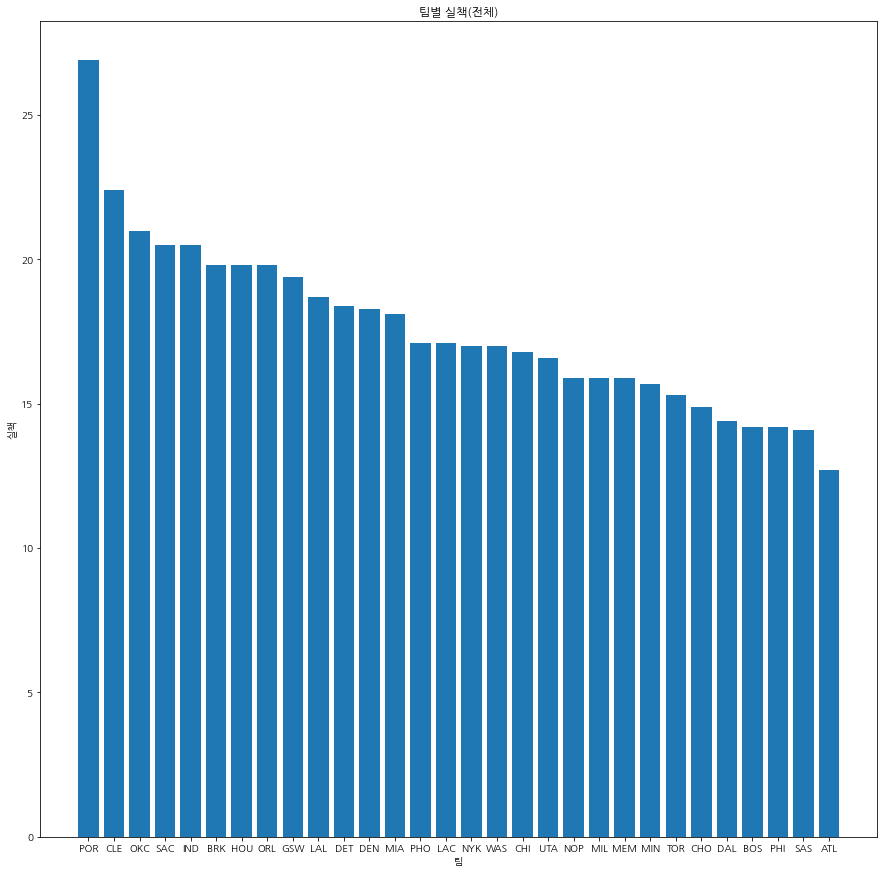

In [275]:
#팀 별로 인원 수가 달라서 정확한 데이터는 아니지만 주요 선수들의 데이터만 남겨서 대략적인 수비 및 공격 실패를 알 수 있어서 해당 데이터를 비교
total_miss=reg_df.groupby('소속팀')['실책'].sum()
total_miss=total_miss.sort_values(ascending=False)

plt.figure(figsize=(15, 15))
plt.bar(total_miss.index,total_miss,width=0.8)
plt.title("팀별 실책(전체)")
plt.xlabel("팀")
plt.ylabel("실책")
plt.show()

정규 시즌 팀별 실책 총합 비교(컨퍼런스)

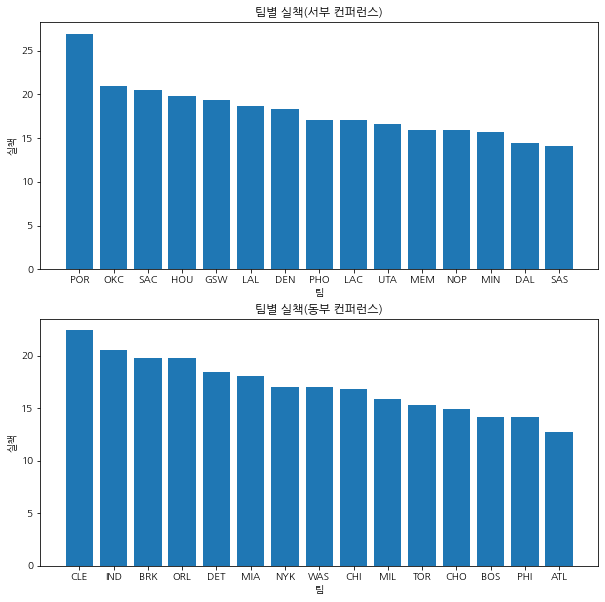

In [276]:
total_miss_west=west_reg_df.groupby('소속팀')['실책'].sum()
total_miss_west=total_miss_west.sort_values(ascending=False)

total_miss_east=east_reg_df.groupby('소속팀')['실책'].sum()
total_miss_east=total_miss_east.sort_values(ascending=False)

fig, ax=plt.subplots(2,1,figsize=(10,10))
ax[0].bar(total_miss_west.index,total_miss_west,width=0.8)
ax[0].set_title("팀별 실책(서부 컨퍼런스)")
ax[0].set_xlabel("팀")
ax[0].set_ylabel("실책")

ax[1].bar(total_miss_east.index,total_miss_east,width=0.8)
ax[1].set_title("팀별 실책(동부 컨퍼런스)")
ax[1].set_xlabel("팀")
ax[1].set_ylabel("실책")
plt.show()

정규 시즌 팀별 홈승 비교

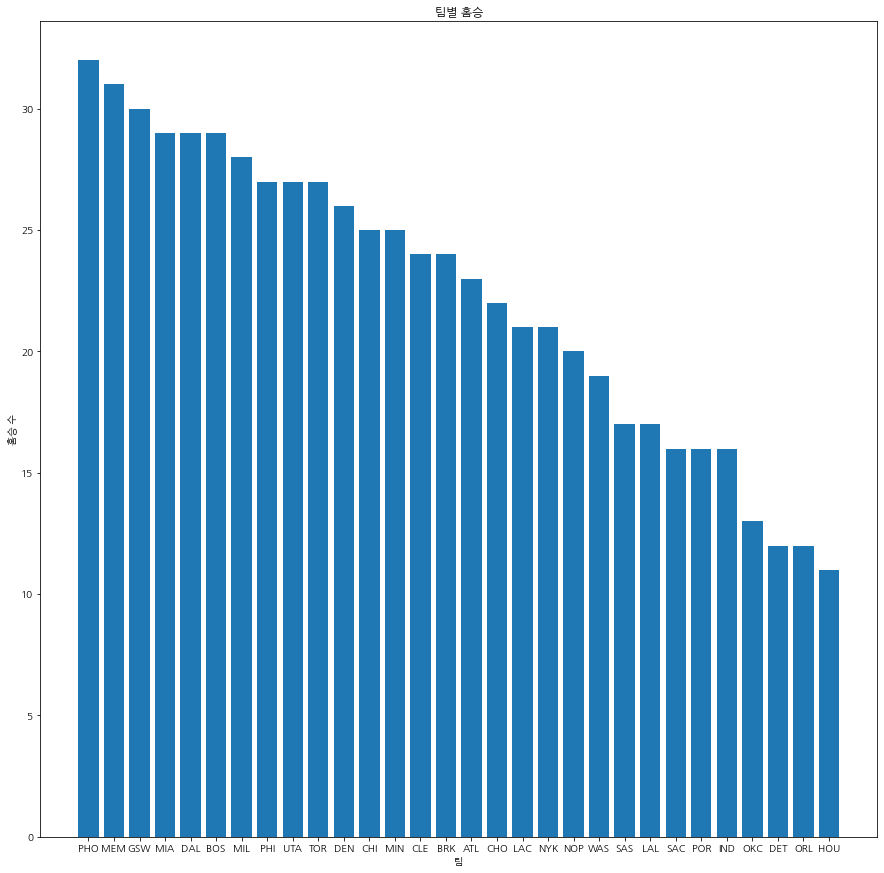

In [279]:
#홈에서 어느 팀이 강했나를 확인할 수 있는 데이터
sort_home_win=total_rank_df['홈승'].sort_values(ascending=False)

plt.figure(figsize=(15, 15))
plt.bar(total_rank_df['팀'],sort_home_win,width=0.8)
plt.title("팀별 홈승")
plt.xlabel("팀")
plt.ylabel("홈승 수")
plt.show()

정규 시즌 팀별 원정승 비교

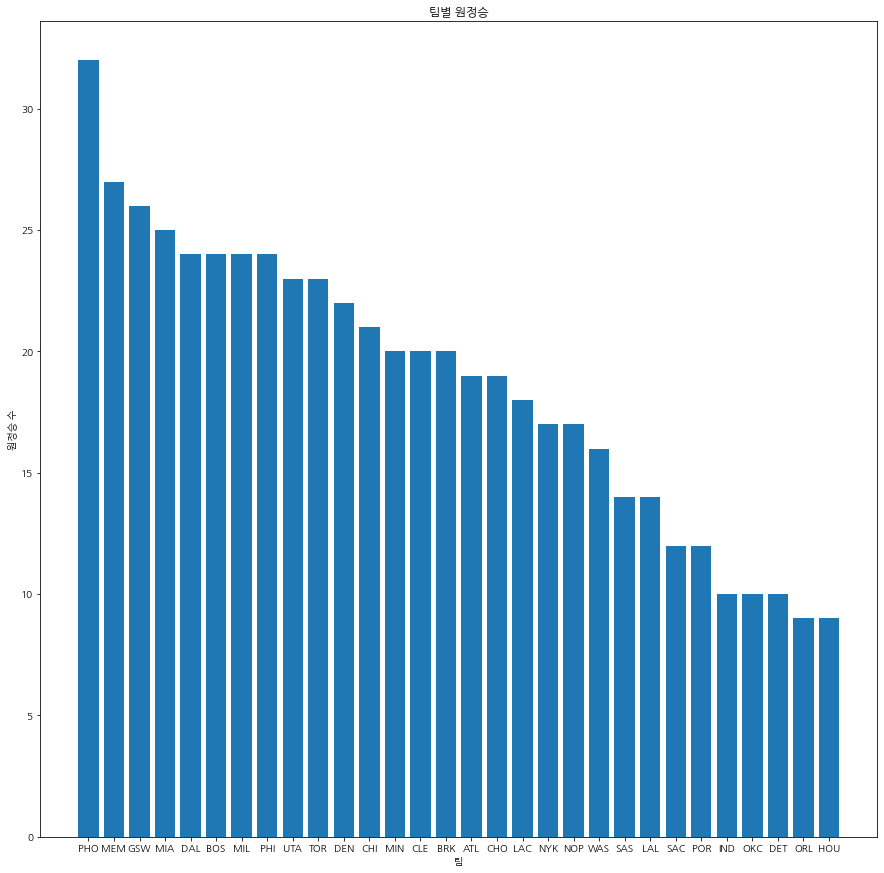

In [280]:
#원정에서 어느 팀이 강했나를 확인할 수 있는 데이터
sort_away_win=total_rank_df['원정승'].sort_values(ascending=False)

plt.figure(figsize=(15, 15))
plt.bar(total_rank_df['팀'],sort_away_win,width=0.8)
plt.title("팀별 원정승")
plt.xlabel("팀")
plt.ylabel("원정승 수")
plt.show()